In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import KFold,cross_val_score

import pickle
import warnings
warnings.filterwarnings('ignore')

## Fake News Dataset

In [2]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake.shape

(23481, 4)

**- Making new column as Label for the true/fake news (Fake news = 0)**

In [4]:
fake['label'] = 0

In [5]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## True News Dataset

In [7]:
true = pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
true.shape

(21417, 4)

**- Making new column as Label for the true/fake news (True news = 1)**

In [9]:
true['label'] = 1

In [10]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


## Concating the True and Fake Dataset

In [11]:
df = [fake,true]

In [12]:
news = pd.concat(df)
news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


**Dataset:**
- Title: Headlines of the news.
- Text: Content of the news.
- Subject: Subject of the news.
- Date: Date of the news.
- Label: News is True(1)/False(0)

## EDA

**Dropping the date column.**

In [13]:
news.drop('date', axis = 1, inplace = True)

**Shape of the dataset**

In [14]:
news.shape

(44898, 4)

**Exploring the Subject Column.**

In [15]:
news['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

    There are 2 same fields, so we are combining them together.

In [16]:
news['subject'] = news['subject'].replace('politics','politicsNews')

In [17]:
news['subject'].value_counts()

politicsNews       18113
worldnews          10145
News                9050
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

## Description

In [18]:
news.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Information

In [19]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   label    44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


**Null Values.**

In [20]:
news.isna().sum()

title      0
text       0
subject    0
label      0
dtype: int64

## Visualization

<AxesSubplot:xlabel='count', ylabel='subject'>

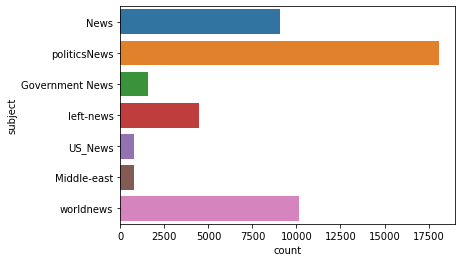

In [21]:
sns.countplot(y = news['subject'])

- Political News are the most common news.
- Then World News.
- US News & Middle-east news are the lowest news.

<AxesSubplot:xlabel='label', ylabel='subject'>

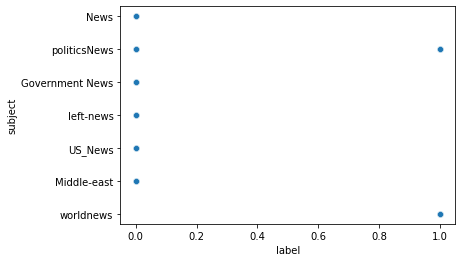

In [22]:
sns.scatterplot(y = news['subject'], x = news['label'])

- There are no fake news for World News.
- Politics news can be True or it can be False.

## Natural Language Processing (NLP) 

## Data Preprocessing

**- Converting to lower**

In [23]:
news['title'] = news['title'].str.lower()
news['text'] = news['text'].str.lower()

**- Stop Words**

In [24]:
stop_words = stopwords.words('english')

**- Original Length**

In [25]:
original_title = news['title'].str.len()
original_text = news['text'].str.len()

**- Replacing the email address as email.**

In [26]:
news['title'] = news['title'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')
news['text'] = news['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')

**- Replacing the websites links as website.**

In [27]:
news['title'] = news['title'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','website')
news['text'] = news['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','website')

**- Replacing the phone No. as phonenumber.**

In [28]:
news['title'] = news['title'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
news['text'] = news['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

**- Replacing the currency as doller.**

In [29]:
news['title'] = news['title'].str.replace(r'£|\$', 'dollers')
news['text'] = news['text'].str.replace(r'£|\$', 'dollers')

**- Replacing any no. as number.**

In [30]:
news['title'] = news['title'].str.replace(r'\d+(\.\d+)?', 'number')
news['text'] = news['text'].str.replace(r'\d+(\.\d+)?', 'number')

**- Dealing with Punctuation**

In [31]:
news['title'] = news['title'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))
news['text'] = news['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

**- Removing Stop word**

In [32]:
news['title'] = news['title'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
news['text'] = news['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

**- Applying Lemmatization**

In [33]:
lem = WordNetLemmatizer()

In [34]:
news['title'] = news['title'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))
news['text'] = news['text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

**- Cleaned Length**

In [35]:
cleaned_title = news['title'].str.len()
cleaned_text = news['text'].str.len()

In [36]:
print('Original title length : ',original_title.sum())
print('cleaned title length : ',cleaned_title.sum())

Original title length :  3596856
cleaned title length :  3059254


In [37]:
print('Original text length : ',original_text.sum())
print('cleaned text length : ',cleaned_text.sum())

Original text length :  110858087
cleaned text length :  78875097


## WordCloud

**Text Column**

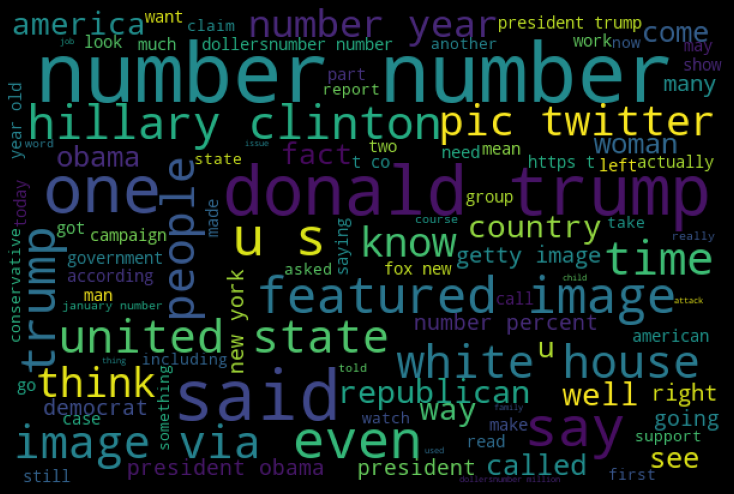

In [38]:
hams = news['text'][news['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Title Column.**

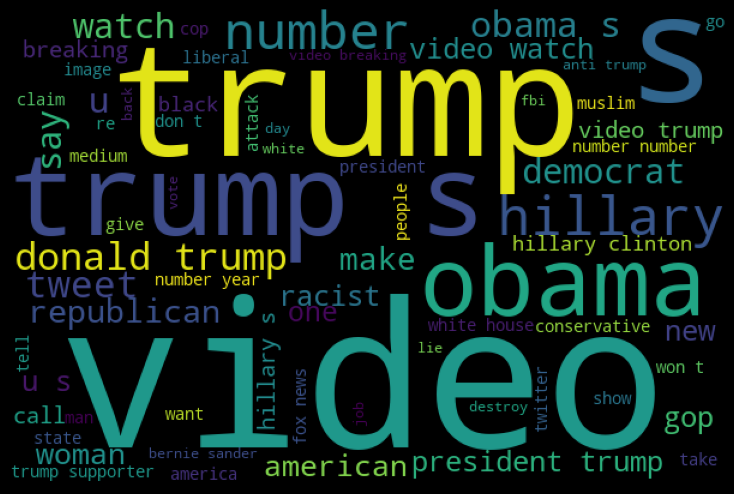

In [39]:
hams = news['title'][news['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=70).generate(' '.join(hams))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Final Dataset

In [40]:
news

,title,text,subject,label
0,donald trump sends embarrassing new year’s eve...,donald trump wish american happy new year leav...,News,0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,0
2,sheriff david clarke becomes internet joke thr...,"friday, revealed former milwaukee sheriff davi...",News,0
3,trump obsessed even obama’s name coded website...,"christmas day, donald trump announced would ba...",News,0
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,News,0
...,...,...,...,...
21412,'fully committed' nato back new u.s. approach ...,brussels (reuters) nato ally tuesday welcomed ...,worldnews,1
21413,lexisnexis withdrew two product chinese market,"london (reuters) lexisnexis, provider legal, r...",worldnews,1
21414,minsk cultural hub becomes authority,minsk (reuters) shadow disused soviet-era fact...,worldnews,1
21415,vatican upbeat possibility pope francis visiti...,moscow (reuters) vatican secretary state cardi...,worldnews,1


**Encoding**

In [41]:
lb = LabelEncoder()

In [42]:
news['subject'] = lb.fit_transform(news['subject'])

**TF-IDF Vectorization**

In [43]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(news['text'])
x = features

In [44]:
y = news.label

## Model Building

**- Train Test Split**

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 90)

**- Function for Training & Testing**

In [46]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))
        print('\n ----- Roc Curve ----- \n')
        plot_roc_curve(clas, x_test, y_test) 

**- Model Instantiating**

In [47]:
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

**- AdaBoost Classifier**


 ----- Train Result ----- 

Accuracy Score: 0.9958423662875301

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     17634
           1       0.99      1.00      1.00     16039

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673


 ----- Confusion matrix ----- 
 [[17537    97]
 [   43 15996]]

 ----- Test Result ----- 

Accuracy Score: 0.9941202672605791

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5847
           1       0.99      1.00      0.99      5378

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225


 ----- Confusion matrix ----- 
 [[5804   43]
 [  23 5355]]

 ----- Roc Curve -

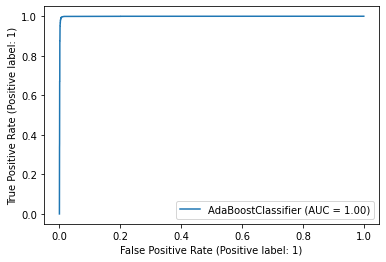

In [48]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- GradientBoosting Classifier**


 ----- Train Result ----- 

Accuracy Score: 0.9970599590176106

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17634
           1       1.00      1.00      1.00     16039

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673


 ----- Confusion matrix ----- 
 [[17563    71]
 [   28 16011]]

 ----- Test Result ----- 

Accuracy Score: 0.995011135857461

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5847
           1       0.99      1.00      0.99      5378

    accuracy                           1.00     11225
   macro avg       0.99      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225


 ----- Confusion matrix ----- 
 [[5810   37]
 [  19 5359]]

 ----- Roc Curve --

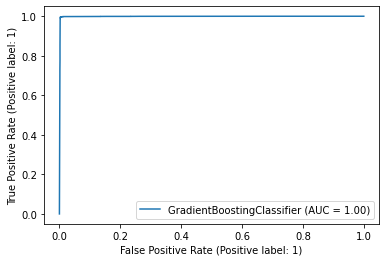

In [49]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Classifier**


 ----- Train Result ----- 

Accuracy Score: 0.9999703026163395

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17634
           1       1.00      1.00      1.00     16039

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673


 ----- Confusion matrix ----- 
 [[17634     0]
 [    1 16038]]

 ----- Test Result ----- 

Accuracy Score: 0.996347438752784

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5847
           1       0.99      1.00      1.00      5378

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225


 ----- Confusion matrix ----- 
 [[5818   29]
 [  12 5366]]

 ----- Roc Curve --

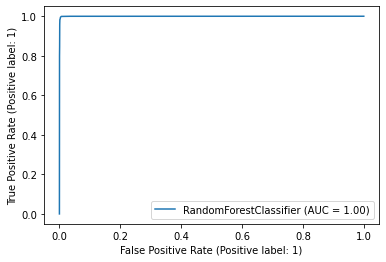

In [50]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

**- DecisionTree Classifier**



 ----- Train Result ----- 

Accuracy Score: 0.9999703026163395

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17634
           1       1.00      1.00      1.00     16039

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673


 ----- Confusion matrix ----- 
 [[17634     0]
 [    1 16038]]

 ----- Test Result ----- 

Accuracy Score: 0.9949220489977728

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5847
           1       1.00      0.99      0.99      5378

    accuracy                           0.99     11225
   macro avg       1.00      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225


 ----- Confusion matrix ----- 
 [[5830   17]
 [  40 5338]]

 ----- Roc Curve -

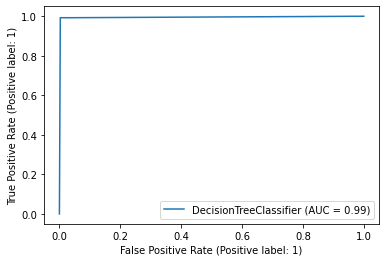

In [51]:
dt.fit(x_train,y_train)
score(dt, x_train,x_test,y_train,y_test,train = True)
score(dt, x_train,x_test,y_train,y_test,train = False)

**- KNeighbors Classifier**


 ----- Train Result ----- 

Accuracy Score: 0.7449588691236302

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.68      0.98      0.80     17634
           1       0.96      0.48      0.64     16039

    accuracy                           0.74     33673
   macro avg       0.82      0.73      0.72     33673
weighted avg       0.81      0.74      0.73     33673


 ----- Confusion matrix ----- 
 [[17333   301]
 [ 8287  7752]]

 ----- Test Result ----- 

Accuracy Score: 0.6896213808463252

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.63      0.98      0.77      5847
           1       0.94      0.38      0.54      5378

    accuracy                           0.69     11225
   macro avg       0.78      0.68      0.65     11225
weighted avg       0.78      0.69      0.66     11225


 ----- Confusion matrix ----- 
 [[5708  139]
 [3345 2033]]

 ----- Roc Curve -

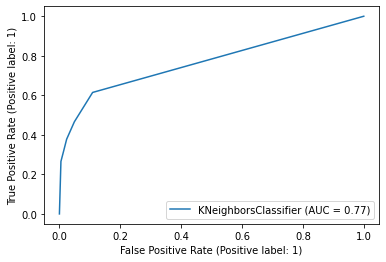

In [52]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

**- Logistic Regression**


 ----- Train Result ----- 

Accuracy Score: 0.9914471535057762

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     17634
           1       0.99      0.99      0.99     16039

    accuracy                           0.99     33673
   macro avg       0.99      0.99      0.99     33673
weighted avg       0.99      0.99      0.99     33673


 ----- Confusion matrix ----- 
 [[17454   180]
 [  108 15931]]

 ----- Test Result ----- 

Accuracy Score: 0.9851224944320712

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5847
           1       0.98      0.99      0.98      5378

    accuracy                           0.99     11225
   macro avg       0.98      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225


 ----- Confusion matrix ----- 
 [[5747  100]
 [  67 5311]]

 ----- Roc Curve -

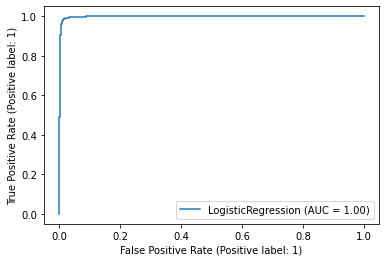

In [53]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

    Every Model is working fine except the KNeighborsClassifier, and we are selecting the RandomForestClassifier as it is giving the best score.

**Original VS Predicted**

In [54]:
a_rf = np.array(y_test)
predicted_rf = np.array(rf.predict(x_test))
df_rf = pd.DataFrame({'Original':a_rf,'Predicted':predicted_rf})
df_rf

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
11220,0,0
11221,1,1
11222,1,1
11223,0,0


**Cross-Validation**

In [55]:
k_f = KFold(n_splits = 3,shuffle = True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [56]:
cross_val_score(rf,x,y,cv = 5).mean()

0.9953672030084549

    Model is working fine, No over-fitting problem.

## Saving the Model

In [57]:
filename = 'Fake_news.pickle'
pickle.dump(rf, open(filename, 'wb'))